In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
mouse_metadata_filepath = "data/Mouse_metadata.csv"
study_results_filepath = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_filepath)
study_results = pd.read_csv(study_results_filepath)
# mice_count = len(mouse_metadata["Mouse ID"].value_counts())
# mice_count

combined_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_study_data.head()
# mouse_metadata.tail()
# study_results.tail()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
number_of_mice = len(combined_study_data["Mouse ID"].value_counts())
number_of_mice
# combined_study_data.shape

249

In [4]:
duplicated_mice_id = combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice_id.shape

(5, 8)

In [5]:
clean_combined_data = combined_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_combined_data.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [6]:
number_of_mice = len(clean_combined_data["Mouse ID"].value_counts())
number_of_mice
# clean_combined_data.shape

249

In [9]:
# drug_list = (Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, oniferol)
# name = 0
# for name in range(len(drug_list)):
#     name +=1
#     tumor_volume1 = clean_combined_data.loc[clean_combined_data['Drug Regimen'].isin(drug_list), ['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
#     # if clean_combined_data['Drug Regimen'] is str(name):
#     # tumor_volume1 = clean_combined_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
#     # tumor_volume1 = clean_combined_data.loc[clean_combined_data['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
# tumor_volume1

SyntaxError: invalid syntax (<ipython-input-9-c661a1211988>, line 9)

In [7]:
drug_list = [Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, oniferol]
tumor_volume1 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume2 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume3 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume4 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Ketapril', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume5 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Naftisol', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume6 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Placebo', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume7 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Propriva', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume8 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume9 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Stelasyn', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume10 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Zoniferol', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume1
# print(type(tumor_volume1))
# tumor_volume1 = tumor_volume1.reset_index()
summary_table_list = ([tumor_volume1, tumor_volume2, tumor_volume3, tumor_volume4, tumor_volume5, tumor_volume6, tumor_volume7, tumor_volume8, tumor_volume9, tumor_volume10])
# [tumor_volume4], [tumor_volume5], [tumor_volume6], [tumor_volume7], [tumor_volume8], [tumor_volume9],[tumor_volume3], [tumor_volume10] , 
# summary_table_list = summary_table_list.reset_index()
# summary_table = pd.DataFrame(summary_table_list, columns=['mean', 'median', 'var', 'std', 'sem'], index=[clean_combined_data['Drug Regimen'].unique()])
summary_table = pd.concat(summary_table_list, keys=drug_list, axis=1)
summary_table
# tumor_volume1

NameError: name 'Capomulin' is not defined

In [8]:
summary_stat = clean_combined_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
# summary_stat = summary_stat.st
summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
bar_plot_data = clean_combined_data.groupby("Drug Regimen")['Drug Regimen'].count()
# ["Mouse ID"].reset_index().sort_values("Mouse ID", ascending=False, ignore_index=True)
bar_plot_data = bar_plot_data.sort_values(ascending=False)
# bar_plot = bar_plot_data.reset_index().sort_values('Drug Regimen', ascending=False, ignore_index=True)
bar_plot_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Drug Regimen vs Number of Mice')

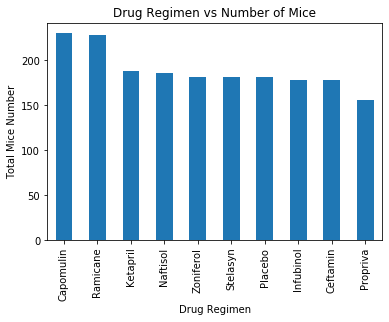

In [10]:
bar_chart = bar_plot_data.plot.bar()
bar_chart.set_ylabel('Total Mice Number')
bar_chart.set_title('Drug Regimen vs Number of Mice')

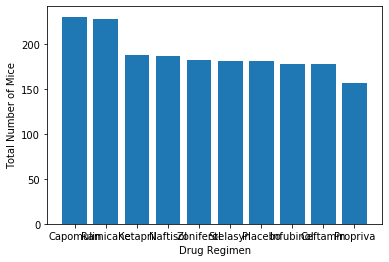

In [12]:
mice_number = bar_plot_data.keys()
plt.bar(mice_number, bar_plot_data, align='center')
# plt.title('Drug Regimen vs Number of Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.show()

In [13]:
pie_chart_data = clean_combined_data.groupby('Sex')['Sex'].count()
pie_chart_data = pie_chart_data.sort_values(ascending=False)
pie_chart_data

Sex
Male      958
Female    930
Name: Sex, dtype: int64

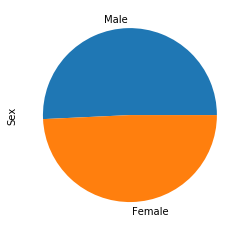

In [14]:
pie_chart = pie_chart_data.plot.pie()

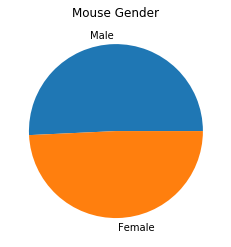

In [39]:
labels = ['Male', 'Female']
plt.pie(pie_chart_data, labels=labels)
plt.title('Mouse Gender')
plt.show()

In [17]:
max_df = clean_combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [18]:
max_merge = clean_combined_data.merge(max_df, on=['Mouse ID', 'Timepoint'])
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
treatments = max_merge['Drug Regimen']
list(treatments).sort()
tumor_vol_data = []
print(treatments)

0       Ramicane
1      Capomulin
2      Capomulin
3      Capomulin
4       Ramicane
         ...    
244     Stelasyn
245     Propriva
246    Infubinol
247     Naftisol
248     Naftisol
Name: Drug Regimen, Length: 249, dtype: object


In [20]:
quartiles = treatments.quantile([.25, .5, .75])
quartiles

TypeError: can't multiply sequence by non-int of type 'float'

In [21]:
columns = ["Drug Regimen","Weight (g)",  "Timepoint", "Tumor Volume (mm3)"]
line_plot_data = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin", columns]
line_plot_data

,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
10,Capomulin,17,0,45.000000
11,Capomulin,17,5,43.878496
12,Capomulin,17,10,37.614948
13,Capomulin,17,15,38.177232
14,Capomulin,17,20,36.866876
...,...,...,...,...
440,Capomulin,24,45,47.685963
1452,Capomulin,25,0,45.000000
1453,Capomulin,25,5,45.597064
1454,Capomulin,25,10,46.059608


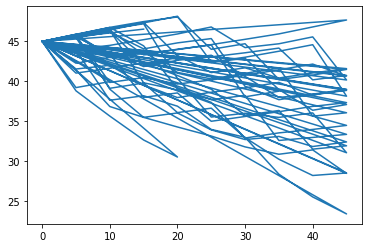

In [22]:
plt.plot(line_plot_data['Timepoint'], line_plot_data['Tumor Volume (mm3)'])
plt.show()

In [23]:
linear_corr = line_plot_data.groupby('Weight (g)').mean()
linear_corr = linear_corr.reset_index()
linear_corr

,Weight (g),Timepoint,Tumor Volume (mm3)
0,15,22.500000,36.182040
1,17,21.538462,37.214133
2,19,22.500000,41.182391
3,20,22.500000,39.141053
4,21,21.666667,42.088700
5,22,22.500000,43.288490
6,23,20.217391,43.341051
7,24,22.500000,44.805810
8,25,18.214286,44.062109


The correlation coefficient is 0.95


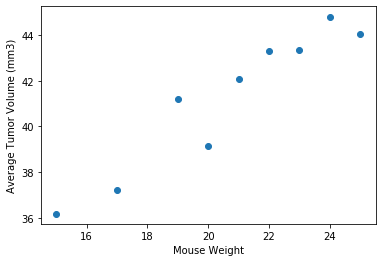

In [27]:
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,volume)
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.9034966277438606


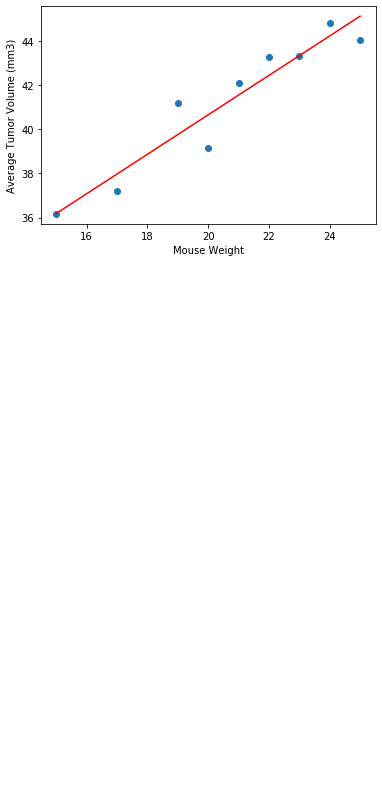

In [37]:
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()